# Projectile Motion Assignment: Due 9/21

## 2D Projectile Motion with Quadratic Drag 

Quadratic drag term is given by $\vec{f}_{drag} = -cv\vec{v}$. This leads to equations of motion in the horizontal ($x$) and vertical ($y$) directions given by 

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

,where $'$ is a time derivative.

## Problem

To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter, $D = 15\;cm$, density $\rho = 7.8\;g/cm^3$) that is fired with initial velocity $300 m/s$ at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = c(y) v^2$ where $c(y) = \gamma D^2 exp(-y/\lambda)$ with $\gamma$ given as $0.25\;N\cdot s^2/m^4$ and $\lambda = 10,000\;m$. 

# Part a)

Ignoring air resistance completely, write down the equations of motion for the cannonball (use the markup feature in Jupyter notbook and latex (https://en.wikibooks.org/wiki/LaTeX/Mathematics)) 

$$
\frac{dx}{dt} = v_{x0} = v_{0}cos(\theta) \\
\frac{dy}{dt} = v_{y0} - gt = v_{0}sin(\theta) - gt \\ 	
$$

Code the equations into a function 

In [72]:
#define projectile motion function in vaccum
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib notebook

def proj_vac(t, v):   
        theta = 5*math.pi/18
        v = 300
        g = 9.8
        return np.array([x[0] + v*np.cos(theta),x[1] + v*np.sin(theta) - g*t ])


Using Scipy (*RK4(5)* method) solve numerically $x(t)$ and $y(t)$ for $0 \le t \le 3.5\;s$

In [73]:
#code
from scipy import integrate
t1 = np.linspace(0.0, 3.5, num=50)
x = np.array([0.0,0.0])
sol_RK45 = integrate.solve_ivp(proj_vac,(0.0,3.5),x,method='RK45', t_eval = t1)

Plot the ball's trajectory (vertical vs. horizontal positions) and find it's horizontal range

<IPython.core.display.Javascript object>


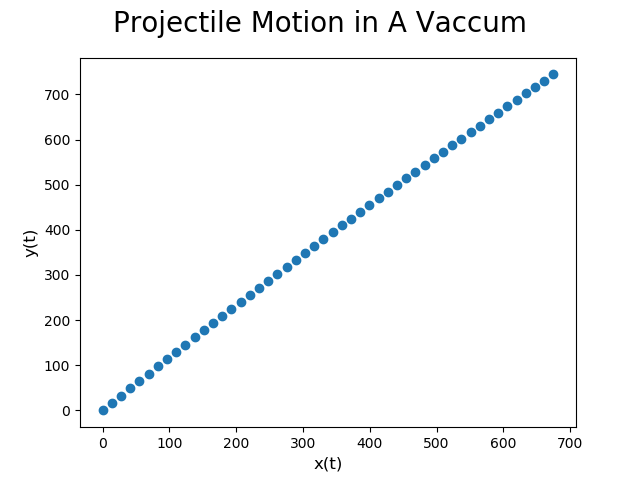

Text(0, 0.5, 'y(t)')

In [74]:
#codes
x1 = sol_RK45.y[0]
y1 = sol_RK45.y[1]
plt.figure()
plt.scatter(x1,y1)
plt.suptitle("Projectile Motion in A Vaccum",fontsize=20)
plt.xlabel("x(t)",fontsize=12)
plt.ylabel("y(t)",fontsize=12)

Using the interactive plot, we can see the horizontal distance is approximately 674 meters at time t = 3.5.

# Part b)

Write your own Runge-Kutta order 4 function and use it to solve Part a) [Meaning do not use Scipy for this part].

In [69]:
#codes
def rungekutta_4(f,t,x0, args=()):
    n = len(t)
    x = np.zeros( ( n, len(x0) ) )
    x[0] = x0 #set inital condition 
    
    for i in range (0,n-1):
        dt = t[i+1]-t[i]
        k1 = f(t[i],x[i])
        k2 = f(t[i]+dt/2.0,x[i]+dt/2.0*k1)
        k3 = f(t[i]+dt/2.0,x[i]+dt/2.0*k2)
        k4 = f(t[i]+dt,x[i]+dt*k3)
        x[i+1] = x[i] + (dt/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)
    return x
sol_rk4 = rungekutta_4(proj_vac,t1,x)
print(sol_rk4)

[[  0.           0.        ]
 [ 13.77402021  16.39023807]
 [ 27.54804042  32.73047613]
 [ 41.32206062  49.0207142 ]
 [ 55.09608083  65.26095227]
 [ 68.87010104  81.45119033]
 [ 82.64412125  97.5914284 ]
 [ 96.41814145 113.68166647]
 [110.19216166 129.72190453]
 [123.96618187 145.7121426 ]
 [137.74020208 161.65238067]
 [151.51422228 177.54261874]
 [165.28824249 193.3828568 ]
 [179.0622627  209.17309487]
 [192.83628291 224.91333294]
 [206.61030311 240.603571  ]
 [220.38432332 256.24380907]
 [234.15834353 271.83404714]
 [247.93236374 287.3742852 ]
 [261.70638394 302.86452327]
 [275.48040415 318.30476134]
 [289.25442436 333.6949994 ]
 [303.02844457 349.03523747]
 [316.80246477 364.32547554]
 [330.57648498 379.5657136 ]
 [344.35050519 394.75595167]
 [358.1245254  409.89618974]
 [371.8985456  424.9864278 ]
 [385.67256581 440.02666587]
 [399.44658602 455.01690394]
 [413.22060623 469.95714201]
 [426.99462643 484.84738007]
 [440.76864664 499.68761814]
 [454.54266685 514.47785621]
 [468.31668706

How does your Runge-Kutta 4th order evaluation compare to Scipy's *RK4(5)* method?
My method also returns approximately 674 meters as the horizontal distance at t = 3.5 seconds, so this is a very good approximation.

# Part c)

Now include air resistance, but ignore the variation of atmospheric pressure [that is  treat $c(y)$ as a constant  that does not change with position, where $c = \gamma D^2$].

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

$$
\frac{dx}{dt} = v_{x0}e^{\frac{ct}{m}} \\
\frac{dy}{dt} = - \frac{mg}{c} + (v_{y0} + \frac{mg}{c})e^{\frac{ct}{m}} \\
$$

Code the equations into a function

In [101]:
#code
def proj_drag(t, v):   
        theta = 5*math.pi/18
        v = 300
        g = 9.8
        density = 7.8
        D = 0.15
        gamma = 0.25
        c = gamma*(D**2)
        m = (((4/3)*3.14*(D/2)**3)*density)*10**3
        return ([x[0] + v*np.cos(theta)*math.exp(-(c*t)/m),x[1] - ((m*g)/c) + (v*np.sin(theta) + ((m*g)/c))* math.exp(-(c*t)/m)])

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 3.5\;s$

In [120]:
#codes
sol_RK45_drag = integrate.solve_ivp(proj_drag,(0.0,3.5),x,method='RK45', t_eval = t1)
print(sol_RK45_drag)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 38
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
       0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ,
       1.07142857, 1.14285714, 1.21428571, 1.28571429, 1.35714286,
       1.42857143, 1.5       , 1.57142857, 1.64285714, 1.71428571,
       1.78571429, 1.85714286, 1.92857143, 2.        , 2.07142857,
       2.14285714, 2.21428571, 2.28571429, 2.35714286, 2.42857143,
       2.5       , 2.57142857, 2.64285714, 2.71428571, 2.78571429,
       2.85714286, 2.92857143, 3.        , 3.07142857, 3.14285714,
       3.21428571, 3.28571429, 3.35714286, 3.42857143, 3.5       ])
 t_events: None
        y: array([[  0.        ,  13.77381936,  27.54723702,  41.320253  ,
         55.09286731,  68.86507996,  82.63689096,  96.408300

Plot the ball's trajecory and find it's horizontal range

<IPython.core.display.Javascript object>


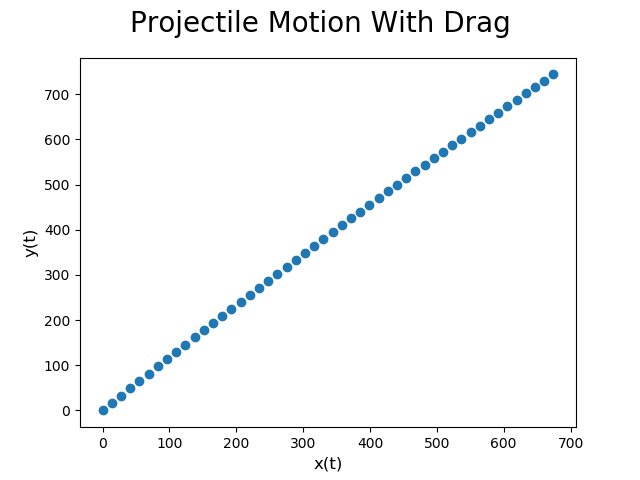

Text(0, 0.5, 'y(t)')

In [132]:
#codes
x2 = sol_RK45_drag.y[0]
y2 = sol_RK45_drag.y[1]
plt.figure()
plt.scatter(x2,y2)
plt.suptitle("Projectile Motion With Drag",fontsize=20)
plt.xlabel("x(t)",fontsize=12)
plt.ylabel("y(t)",fontsize=12)

The horizontal distance for drag included is about 674 meters at t = 3.5 seconds, although it is slightly shorter than without drag included.

# Part d)

Now include the drag term with the atmospheric variation included [meaning $c(y) = \gamma D^2exp(-y/\lambda)$]

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

$$
\frac{dx}{dt} = v_{x0}e^{\frac{c(y)t}{m}} \\
\frac{dy}{dt} = - \frac{mg}{c} + (v_{y0} + \frac{mg}{c})e^{\frac{c(y)t}{m}} \\
$$

Code the equations into a function

In [128]:
#code
def proj_drag_atmosphere(t, v):   
        theta = 5*math.pi/18
        v = 300
        g = 9.8
        density = 7.8
        D = 0.15
        gamma = 0.25
        lam = 10000
        c = gamma*(D**2)
        m = (((4/3)*3.14*(D/2)**3)*density)*10**3
        return [x[0] + v*np.cos(theta)*math.exp(-(c*math.exp(-x[1]/lam)*t)/m),x[1] - ((m*g)/(c*math.exp(-x[1]/lam))) + (v*np.sin(theta) + ((m*g)/(c*math.exp(-x[1]/lam))))* math.exp(-(c*math.exp(-x[1]/lam)*t)/m)]
    
    

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 3.5\;s$

In [129]:
#codes
sol_RK45_drag_atm = integrate.solve_ivp(proj_drag_atmosphere,(0.0,3.5),x,method='RK45', t_eval = t1)
print(sol_RK45_drag_atm)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 38
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
       0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ,
       1.07142857, 1.14285714, 1.21428571, 1.28571429, 1.35714286,
       1.42857143, 1.5       , 1.57142857, 1.64285714, 1.71428571,
       1.78571429, 1.85714286, 1.92857143, 2.        , 2.07142857,
       2.14285714, 2.21428571, 2.28571429, 2.35714286, 2.42857143,
       2.5       , 2.57142857, 2.64285714, 2.71428571, 2.78571429,
       2.85714286, 2.92857143, 3.        , 3.07142857, 3.14285714,
       3.21428571, 3.28571429, 3.35714286, 3.42857143, 3.5       ])
 t_events: None
        y: array([[  0.        ,  13.77381936,  27.54723702,  41.320253  ,
         55.09286731,  68.86507996,  82.63689096,  96.408300

Plot the ball's trajectory and find it's horizontal range

<IPython.core.display.Javascript object>


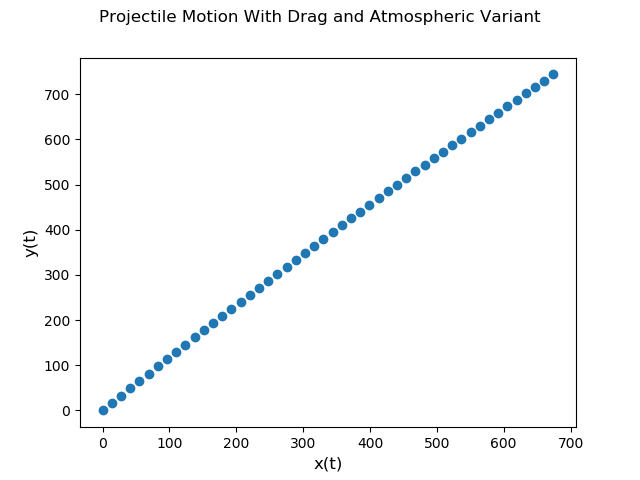

Text(0, 0.5, 'y(t)')

In [112]:
#codes
x3 = sol_RK45_drag_atm.y[0]
y3 = sol_RK45_drag_atm.y[1]
plt.figure()
plt.scatter(x3,y3)
plt.suptitle("Projectile Motion With Drag and Atmospheric Variant",fontsize=12)
plt.xlabel("x(t)",fontsize=12)
plt.ylabel("y(t)",fontsize=12)

# Part e)

Plot the trajectories from parts a), c), and d) on the same plot.

<IPython.core.display.Javascript object>


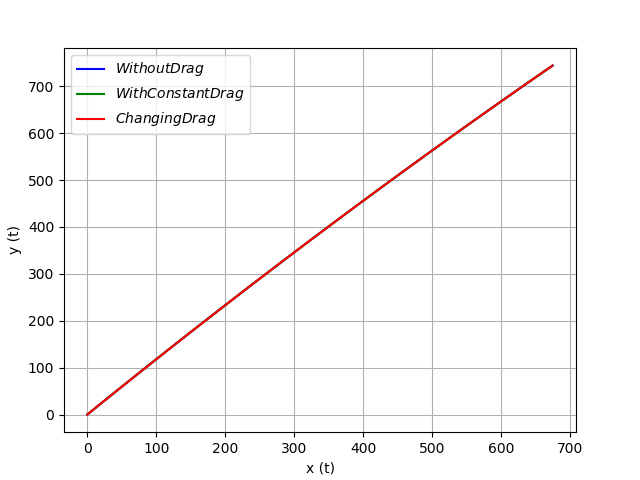

In [133]:
#codes
fig = plt.figure('Projectile Motion Comparison')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(x1,y1,'b', label=r'$Without Drag$')
ax.plot(x2,y2, 'g', label=r'$With Constant Drag$')
ax.plot(x3,y3, 'r', label=r'$Changing Drag$')
ax.legend(loc='best')
ax.set_xlabel('x (t)')
ax.set_ylabel('y (t)')
ax.grid();

Which impacts the motion more: turning on air resistance (i.e with $c(0)$) or turning on the variation with atmosphere (i.e. $c(y)$)

My last two functions are clearly wrong but I'd imagine the constant drag would have more of an effect. It might be because of 10^3 factor I added to the mass, but that doesn't look right either.